## **Name : <font color = #5a5a5a>Harshal Prakash Margaj<font/>**

## **Task 5 : <font color = #5a5a5a>Prediction using Decision Tree Algorithm<font/>**

## **Description : <font color = #5a5a5a>Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.<font/>**

## **Dataset Link : <font color = #5a5a5a>[Dataset](https://bit.ly/3kXTdox)<font/>**

## **Level : <font color = #5a5a5a>Intermediate Level Task<font/>**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Droping the unnecessary columns**

In [ ]:
df = df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Exploring Dataset**

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Data Preprocessing**

## **<font color = #5a5a5a>Convert categorical variable<font/>**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
le = LabelEncoder()

In [ ]:
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **<font color = #5a5a5a>Spliting data into dependent and independent var<font/>**

In [ ]:
x_data = df.iloc[:,:-1]
x_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y_data = df.iloc[:, -1]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

## **<font color = #5a5a5a>Spliting the dataset into train and test split<font/>**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 50)

In [ ]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [ ]:
x_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

# **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

## <font color = #5a5a5a>**Comparison between actual and predicted output**<font/>

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [ ]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

## <font color = #5a5a5a>**Accuracy of `Decision Tree model`**<font/>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred, y_test)

0.9666666666666667

## <font color = #5a5a5a>**Confusion Matrics of `Decision Tree Model`**<font/>

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

## <font color = #5a5a5a>**Classification Report of `Decision Tree Model`**<font/>

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## <font color = #5a5a5a>**Visualization of `Decision Tree Model`**<font/>

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

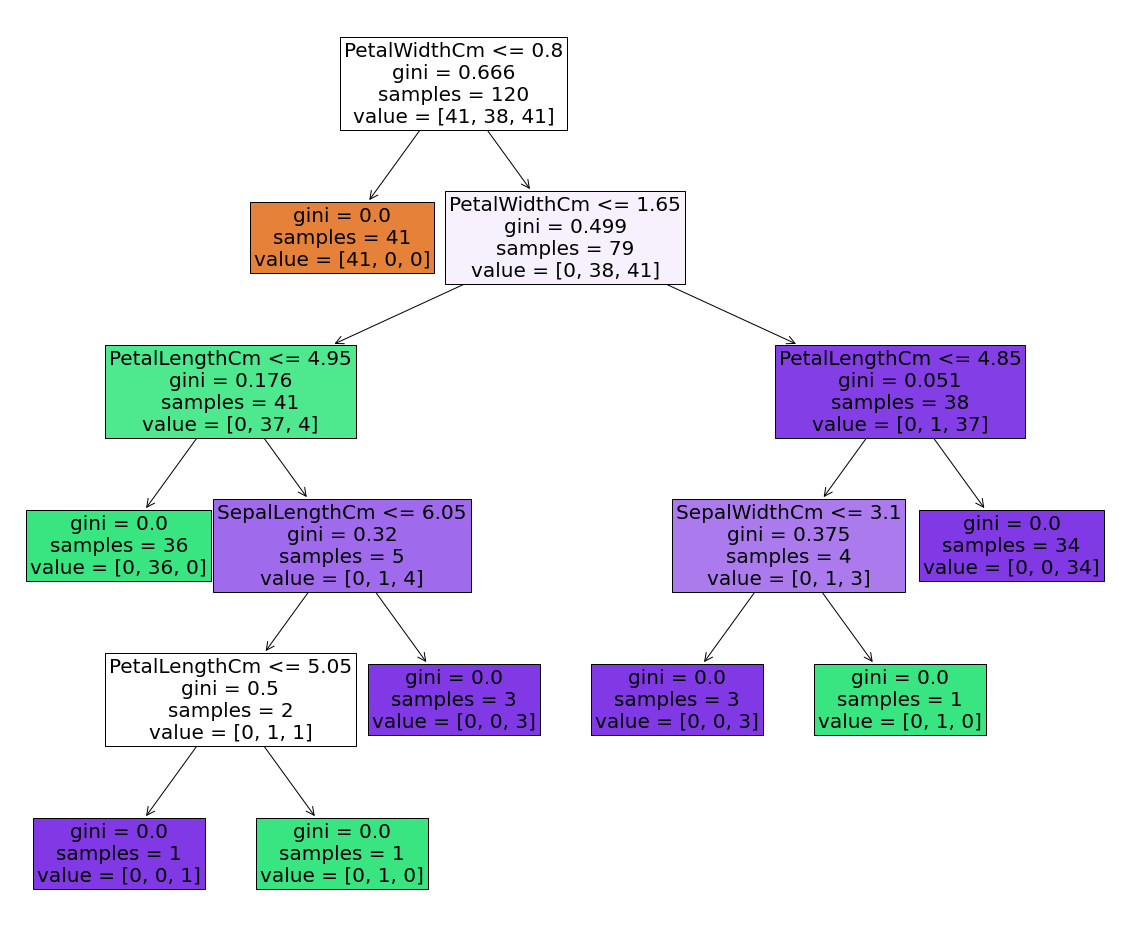

In [ ]:
plt.figure(figsize = (20, 17))
dt_visualization = tree.plot_tree(dt, feature_names = x_data.columns, filled = True, fontsize = 20)

# **Thank You**


